# PROJECT ID - PTID-CDS-JUL-23-1576

# PRCP-1009-CellphonePrice 

## Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.




## IMPORT BASIC LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# LOAD DATASET

In [2]:
data=pd.read_csv('datasets_11167_15520_train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# BASIC CHECK

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.shape

(2000, 21)

- THE GIVEN DATASET HAS 2000 ROWS AND 21 COLUMNS(FEATURES)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# Remove the data points with missing data

In [24]:
#removing the values that are zero
data=data[data['sc_w']!= 0]
data.shape

(1820, 21)

In [8]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- THEY HAVE NO MISSING VALUES

In [10]:
data.duplicated().sum()

0

- THEY HAVE NO DUPLICATE VALUES

# DOMAIN ANALYSIS

- battery_power - Total energy a battery can store in one time measured in mAh
- blue - Has bluetooth or not
- clock_speed - speed at which microprocessor executes instructions
- dual_sim - Has dual sim support or not
- fc - Front Camera mega pixels
- four_g - Has 4G or not
- int_memory - Internal Memory in Gigabytes
- m_dep - Mobile Depth in cm
- mobile_wt - Weight of mobile phone
- n_cores - Number of cores of processor
- pc - Primary Camera mega pixels
- px_height - Pixel Resolution Height
- px_width - Pixel Resolution Width
- ram - Random Access Memory in Megabytes
- sc_h - Screen Height of mobile in cm
- sc_w - Screen Width of mobile in cm
- talk_time - longest time that a single battery charge will last when you are
- three_g - Has 3G or not
- touch_screen - Has touch screen or not
- wifi - Has wifi or not
- price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)


# Visualistion Of Data

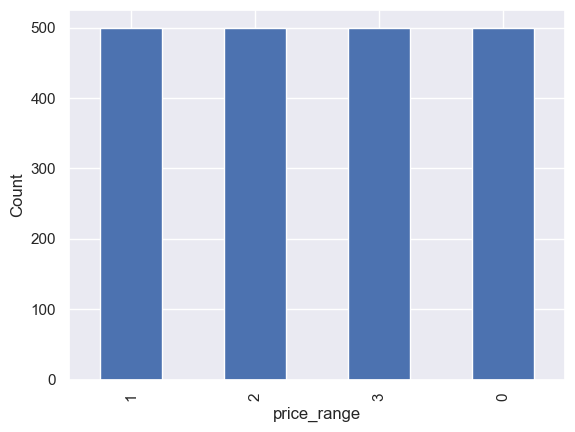

In [14]:
sns.set()
price_plot=data['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

# DATA DISTRIBUTION

# How the battery mAh is spread

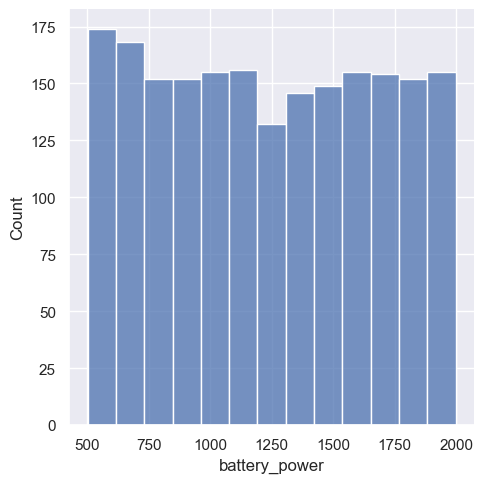

In [15]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data["battery_power"])
plt.show()


# How many devices have Bluetooth and how many don’t

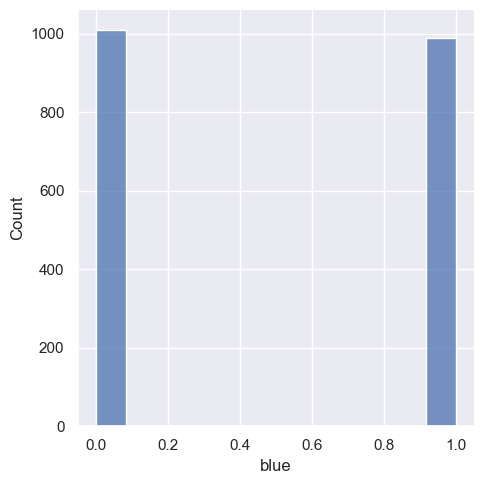

In [16]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data["blue"])
plt.show()

#  Analysis the mobile depth

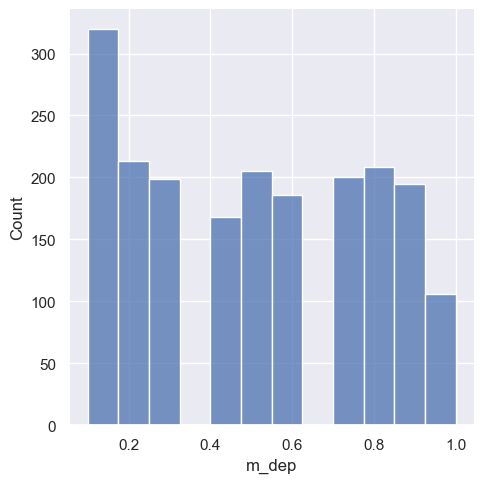

In [17]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data["m_dep"])
plt.show()

#  Missing values

In [13]:
X=data.drop(['price_range'], axis=1)
y=data['price_range']
# missing values
X.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

# Split the data

In [22]:
#for splitting the data
from sklearn.model_selection import train_test_split
X_data, X_valid, y_data, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)

# Creating a confusion matrix

In [23]:
#we define a function for the confution matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

   

# Random Forest Classifier

# Build the model

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)


# Training and prediction 

In [21]:
rfc.fit(X_data, y_data)
y_pred_rfc=rfc.predict(X_valid)

# Apply the function for the accuracy metrics

Random Forest Classifier Accuracy Score:  0.9093406593406593
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.90      0.92      0.91        92
           2       0.82      0.86      0.84        86
           3       0.93      0.88      0.90        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



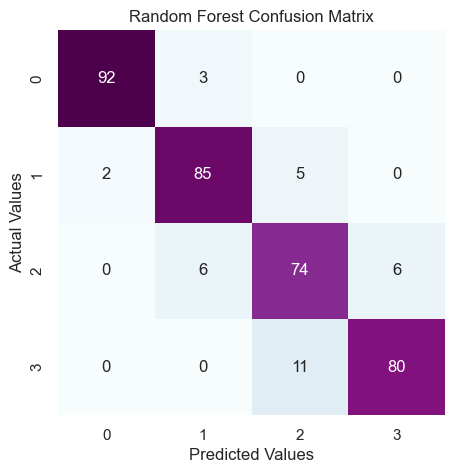

In [21]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')

# Naive Bayes

# Implement the Gaussian NB classifier

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#  Training and prediction

In [27]:
gnb.fit(X_data, y_data)
y_pred_gnb=gnb.predict(X_valid)

# check the accuracy

Gaussian NB Classifier Accuracy Score:  0.8
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       109
           1       0.65      0.76      0.70        89
           2       0.70      0.69      0.70       106
           3       0.91      0.85      0.88        96

    accuracy                           0.80       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.80      0.80       400



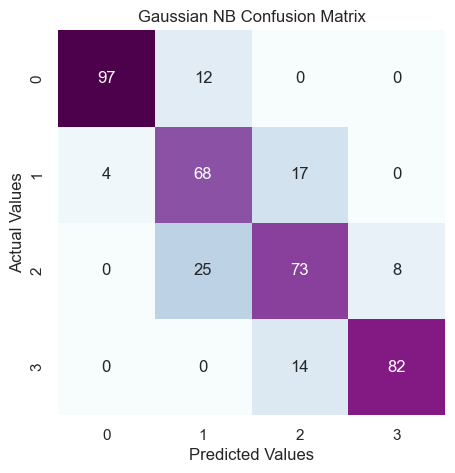

In [28]:
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')

# KNN Classifier

#  Implementation

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3,leaf_size=25)


#  Train the data and make our prediction

In [30]:
knn.fit(X_data, y_data)
y_pred_knn=knn.predict(X_valid)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Check the accuracy

KNN Classifier Accuracy Score:  0.9325
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       109
           1       0.91      0.94      0.93        89
           2       0.90      0.91      0.90       106
           3       0.94      0.92      0.93        96

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



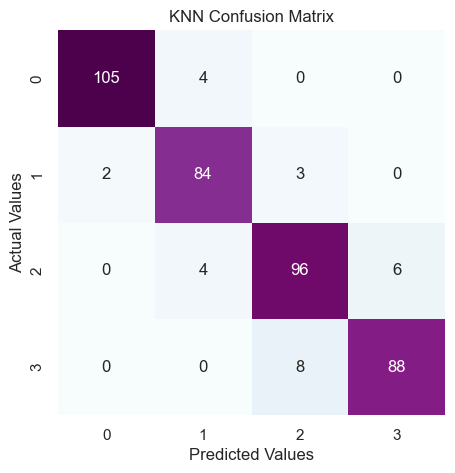

In [31]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')

# Svm Classifier

# Implementation

In [32]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(X_data, y_data)
y_pred_svm=svm_clf.predict(X_valid)

# Check the accuracy

SVM Classifier Accuracy Score:  0.955
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       109
           1       0.90      0.99      0.94        89
           2       0.97      0.90      0.93       106
           3       0.96      0.97      0.96        96

    accuracy                           0.95       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.96      0.95      0.95       400



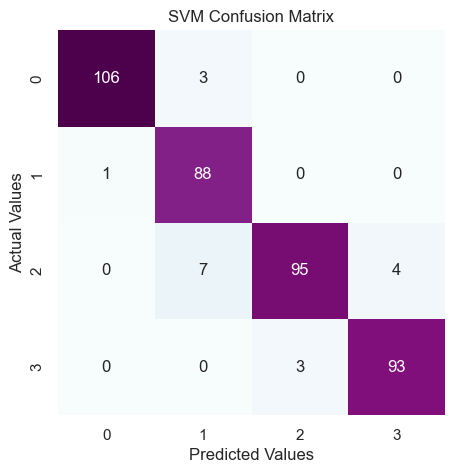

In [33]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')

## Comparing the AcccuracyScore of different ML Models Used.

In [35]:
!pip install prettytable
from prettytable import PrettyTable

In [36]:
pt=PrettyTable()
pt.field_names=['Model','Accuracy Score']
pt.add_row(['RandomForest Classifier','90.93%'])
pt.add_row(['Gaussian NB Classifier','84.61%'])
pt.add_row(['KNN Classifier','93.4%'])
pt.add_row(['SVM Classifier','95.87%'])

print(pt)

+-------------------------+----------------+
|          Model          | Accuracy Score |
+-------------------------+----------------+
| RandomForest Classifier |     90.93%     |
|  Gaussian NB Classifier |     84.61%     |
|      KNN Classifier     |     93.4%      |
|      SVM Classifier     |     95.87%     |
+-------------------------+----------------+


# CONCLUSION

- Here SVM classifier is giving the highest accuracy score of 95% among all the machine learning models that we performed.
   